In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA # Dimensionality Reduction

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import pickle
import time # for computation time assessment
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pickle_in = open("/content/drive/MyDrive/Data/X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Data/y.pickle", "rb")
y = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Data/data.pickle", "rb")
data = pickle.load(pickle_in)

In [4]:
# RECALL
# CLASS 0: NO MASK
# CLASS 1: INCORRECT WEAR OF MASK
# CLASS 2: CORRECT WEAR OF MASK
# See Data Preprocessing for more information

print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17529
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 5737
# of With A Mask: 5883


In [5]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6  ... P4089 P4090 P4091 P4092 P4093 P4094 P4095
0  253  252  253  253  250  248  249  ...   115   102   110   106   103   108   107
1  205  195  202  136   76   77   56  ...    43    42    35    39    43    41    32
2   97   97   96   96   93   94   97  ...    61    59    66    77    80    83    80
3   72   69   71   70   70   74   79  ...    71    64    60    41    29    49    72
4   69   59   67   76   85   86   85  ...   217   213   206   207   189    98    43

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


In [6]:
# Shape
print('\nImage Data Shape:', X.shape)
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (17529, 4096)
Image Data Shape Features: (17529, 4096)
Image Data Shape Target: (17529, 1)


In [7]:
# Normalize the pixel values
X = X / 255.0

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  14023 
Length of our Testing data:  3506


In [9]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Use training data to fit KNN model
knn.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [10]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Use training data to fit KNN model
knn.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [12]:
predictions_set1 = knn.predict(X_test)

In [13]:
# Save Predictions in a pickle
pickle_out = open("predictions_set1.pickle", "wb")
pickle.dump(predictions_set1, pickle_out)
pickle_out.close()

In [14]:
# 75-82% accuracy depending on the divide
print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set1))

KNN Accuracy: 0.756


Text(0.5, 1.0, 'Accuracy Score: 0.7564175698802054')

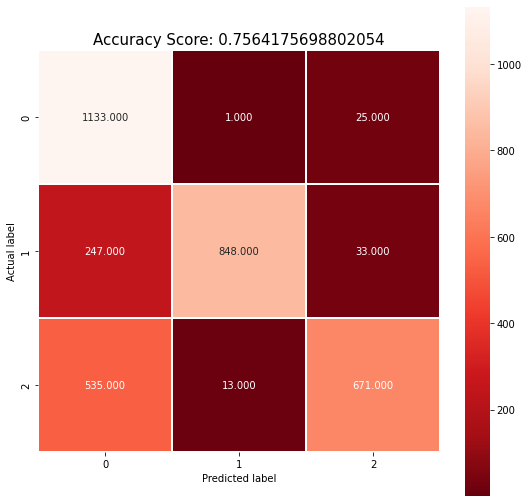

In [15]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set1)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set1))
plt.title(all_sample_title,size=15)

In [16]:
print('KNN Precision: %.3f' % precision_score(y_test, predictions_set1, average='micro'))
print('KNN Recall: %.3f' % recall_score(y_test, predictions_set1, average='micro'))
print('KNN F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='micro'))
print("\nNo Hyperparameter Tuning Classification Report\n", classification_report(y_test, predictions_set1))

KNN Precision: 0.756
KNN Recall: 0.756
KNN F1 Score: 0.756

No Hyperparameter Tuning Classification Report
               precision    recall  f1-score   support

           0       0.59      0.98      0.74      1159
           1       0.98      0.75      0.85      1128
           2       0.92      0.55      0.69      1219

    accuracy                           0.76      3506
   macro avg       0.83      0.76      0.76      3506
weighted avg       0.83      0.76      0.76      3506



In [17]:
# Dimensionality Reduction with Principal Component Analysis (PCA)
pca = PCA(0.90) # Preserve 90% of the variance

X_transformed = pca.fit_transform(X_train) # Fit the pca transform with X_train
X_test_transformed = pca.transform(X_test) # Apply transform to X_test

# Training set shape after Principal Component Analysis form
print(X_transformed.shape)

# Original Training Set Shape
# Notice we lose 3,943 features using PCA, while preserving 90% variance
print(X_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(14023, 154)
(14023, 4096)


In [18]:
# Initialize KNN model for PCA instance
knn_pca = KNeighborsClassifier()

# Use training data to fit KNN model with transformed X_train
knn_pca.fit(X_transformed, y_train.values.ravel())

KNeighborsClassifier()

In [19]:
%%time
# make prediction on entire train data
predictions_set_pca = knn_pca.predict(X_transformed)
print("Accuracy Train PCA:", accuracy_score(y_train, predictions_set_pca))

Accuracy Train PCA: 0.8947443485702061
CPU times: user 7.28 s, sys: 852 ms, total: 8.14 s
Wall time: 6.1 s


In [20]:
%%time
# make prediction on entire test data
predictions_set_pca = knn_pca.predict(X_test_transformed)
print("Accuracy Train PCA:", accuracy_score(y_test, predictions_set_pca))

Accuracy Train PCA: 0.8362806617227609
CPU times: user 1.87 s, sys: 122 ms, total: 2 s
Wall time: 1.47 s



 PCA Classification Report
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      1159
           1       0.97      0.91      0.93      1128
           2       0.94      0.64      0.76      1219

    accuracy                           0.84      3506
   macro avg       0.87      0.84      0.84      3506
weighted avg       0.87      0.84      0.83      3506



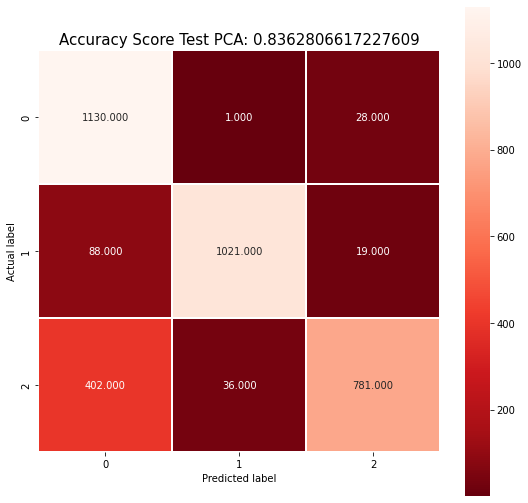

In [21]:
# Calculate Confusion Matrix for PCA
cm = confusion_matrix(y_test, predictions_set_pca)

plt.figure(figsize=(9,9))

# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score Test PCA: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(title,size=15)

print("\n PCA Classification Report\n", classification_report(y_test, predictions_set_pca))

In [23]:
# New KNN instance model
knn = KNeighborsClassifier()

# Dictionary of parameter values we are testing performance for
param_grid = {'n_neighbors': [5, 7, 9, 11], 'p': [2, 4, 6, 8, 10, 20, 50], 'metric': ['euclidean', 'manhattan', 'minkowski']}

# Test all parameter combinations in param_grid
knn_gscv = GridSearchCV(knn, param_grid, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)

In [ ]:
knn_gscv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [ ]:
best_params_ = knn_gscv.best_params_

knn_gscv.best_score_